# The Determinant of Loan Interest Rate

## Dataset Overview

The data set covers the time period 2005 to 2014, the first 9 years of the business. loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others.It contains 113,937 observations of 81 variables. I chose to explore 11 variables in this dataset:Loan origination date, Loan original amount, Term, Loan Status, Borrower monthly income, Credit score, Debt to income ratio, Is borrower homeowner, Delinquencies in the last 7 years, EmploymentStatus.

## Investigation Overview

For this presentation, I focus on the determinants of interest rate
and trying to find out what factor affects the borrower’s interest rate. 

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# high-level overview of dataset 
print(df.shape)
print(df.head())
print(df.info())

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# Univariate Exploration

## Distribution of Interest Rate

The interest rate distribution looks roughly bimodal with one peak at 32%, and a second peak is between 12%-15%.  Moreover, there's a steep jump in frequency right after 32%.

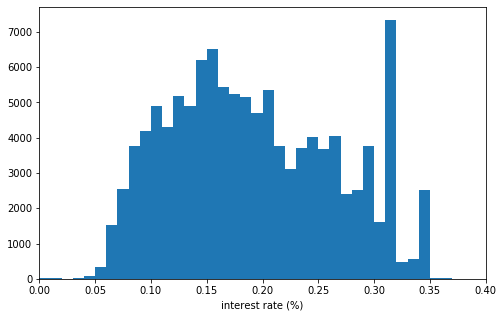

In [6]:
# plotting the distribution of interest rate
bin_size=0.01
plt.figure(figsize=[8, 5])
bins = np.arange(0,df['BorrowerRate'].max()+bin_size,bin_size)
plt.hist(data=df,x='BorrowerRate',bins=bins);
# plt.title('Distribution of interest rate');
plt.xlabel('interest rate (%)')
plt.xlim([0.0,0.4]);

## Distribution of Loan Terms

We have 1 year, 3 years, and 5 years in loan terms. The most common type is a 3-year loan, and 1-year loans are rare, and some people take 5 years loan. we can look further later to see if people tend to repay their loans if they have longer terms of a loan. In the bivariate section, we will see why this is the case.

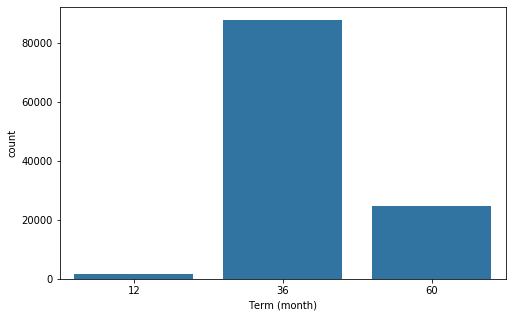

In [7]:
# plotting term of loans
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[0]
sns.countplot(data=df,x='Term',color=base_color);
plt.xlabel('Term (month)');
# plt.title('Distribution Loan Terms');

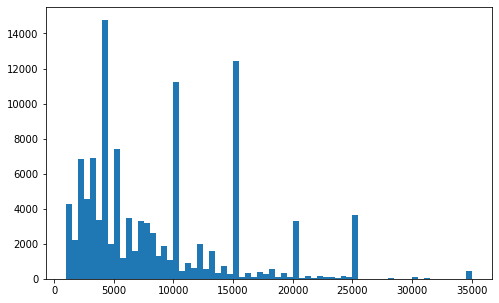

In [8]:
# plotting LoanOriginalAmount on a standard scale
bin_size=500
plt.figure(figsize=[8, 5])
bins = np.arange(1000,df['LoanOriginalAmount'].max()+bin_size,bin_size)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins);


## Distribution of Loan Original Amount

The amount of loan in this dataset has mostly small loans. There are spikes at 4000, the minimum loan is set at $1000. Loan Original Amount in the dataset take on a large range, therefore I Plotted on a logarithmic scale.

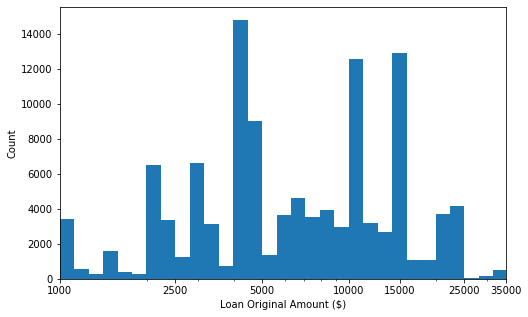

In [9]:
# plotting LoanOriginalAmount with log transformation 
log_binsize=0.05
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(2,np.log10(df['LoanOriginalAmount'].max())+log_binsize,log_binsize)

plt.hist(data=df,x='LoanOriginalAmount',bins=bins);
plt.xscale('log')
# plt.xticks=(['1000', '5000', '10000', '25000', '50000'], ['1k', '5k', '10k', '25k', '50k'])
ticks=[1000,2500, 5000, 10000, 15000,25000, 35000]
labels=['{}'.format(v) for v in ticks]

plt.xticks(ticks,labels)

plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.xlim(1000, 35000);

In [8]:
# convert 'LoanOriginationDate' to date type
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
# extract year from string format date 
df['year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013


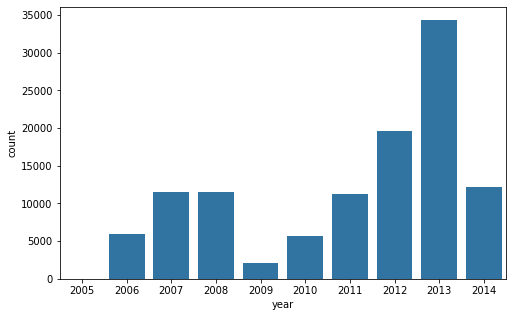

In [9]:
# pltting the distrbution of loan by year
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=df,x='year',color=base_color);

In 2009, the number of loans is dropped. It seems that the economy is recovering a little bit back after the financial crisis. The number of loans grows steadily from 2009 to the first spike in 2013.

In [10]:
# use panda type function to convert Loanstatus column to ordered categorical type putting status in order of number of borrowers
status_level=['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
statusL=pd.api.types.CategoricalDtype(ordered=True,categories=status_level)
df['LoanStatus']=df['LoanStatus'].astype(statusL)

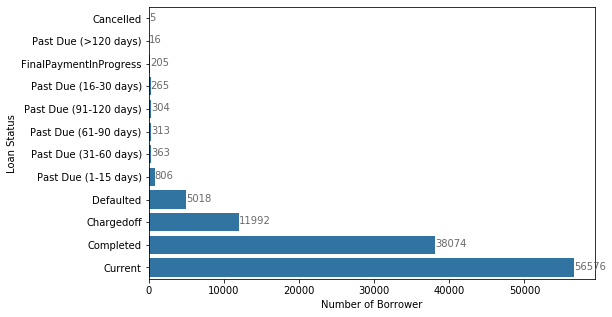

In [11]:
# plotting the LoanStatus
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df,y='LoanStatus',color=base_color);
# add annotations
# n_point=df.shape[0]
# cat_counts=df['LoanStatus'].value_counts()
# get count ticks location&lables
# locs,labels=plt.yticks()
#loop through each pair of location&label
# for loc, label in zip(locs, labels):
#     #get the text property for the label to get the count
#     count=cat_counts[label.get_text()]
#     pct_string = '{:0.1f}%'.format(100*count/n_point)
      #print annotation below the top of bar chart
#     plt.text(loc,1,pct_string,color='b',transform=ax.transAxes)
# set individual bar lables using above list
# reference:https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()
plt.ylabel('Loan Status')
plt.xlabel('Number of Borrower');
# plt.title('Distribution of LoanStatus');


## Distribution of Loan Status

Most borrowers are in "current" and "completed" status (around 83%); there is 17% of borrowers who didn't repay their loans on time

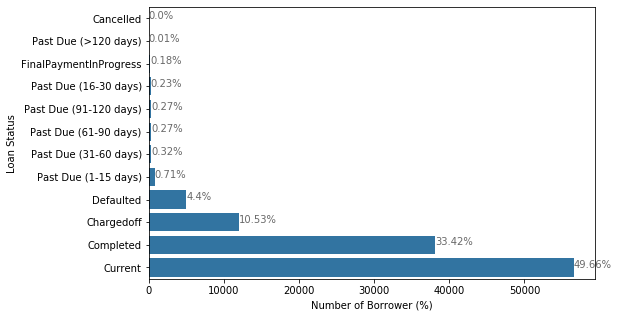

In [12]:
# plotting the LoanStatus
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df,y='LoanStatus',color=base_color);
# add annotations
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()
plt.ylabel('Loan Status')
plt.xlabel('Number of Borrower (%)');
# plt.title('Distribution of LoanStatus');

## Distribution of Employment Status
It is not suprised that most of borrower are employed and having full time jobs.

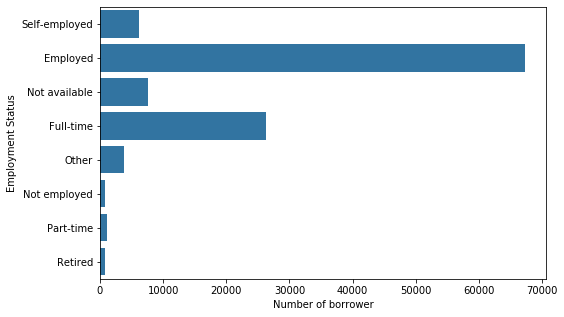

In [16]:
# replace NA with Not available
df['EmploymentStatus'].fillna('Not available', inplace=True)
# exploring more about borrower
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=df,y='EmploymentStatus',color=base_color);
plt.xlabel('Number of borrower')
plt.ylabel('Employment Status');

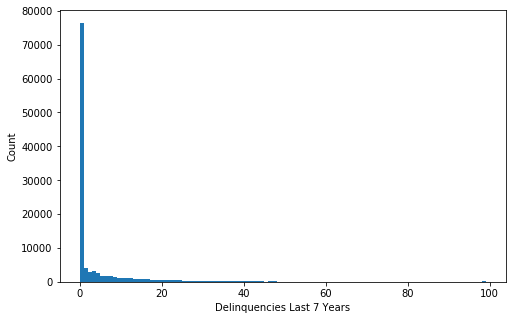

In [17]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, max(df['DelinquenciesLast7Years'])+1, 1)
plt.hist(data=df,x='DelinquenciesLast7Years',bins=bins);
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');

Most people didn't have a history of delinquencies, we can assume that there are some outliers from the graph. Indeed, it's kind of abnormal that people can have delinquencies more than 20 times. 

In [18]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = (df['DelinquenciesLast7Years'] > 20)
print(high_outliers.sum())
print(df.loc[high_outliers,:])

7279
                     ListingKey  ListingNumber            ListingCreationDate  \
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
31      0F683558129866945165D36         643927  2012-09-21 13:37:43.210000000   
32      0F683599787642317AE85C5        1132356  2014-01-10 11:19:14.947000000   
37      10993590382481129382160         915698  2013-09-16 17:22:06.757000000   
46      0F8B34281015537050D4FEC         378497  2008-08-05 19:42:49.197000000   
...                         ...            ...                            ...   
113875  D1DC353111539818204A887         539458  2011-11-16 09:19:53.293000000   
113881  E2C73590325077098CCF6F5         967344  2013-10-09 10:09:28.530000000   
113883  E2D0359051115996117A4D8         949989  2013-10-02 14:21:39.333000000   
113886  E2E83591155138642787408         939046  2013-10-06 01:25:25.037000000   
113911  C9883594035073098BC5D51         996496  2013-11-15 11:42:47.540000000   

       CreditGrade  Te

In [19]:
# remove points with inconsistent depth values.
df_sub = df.loc[-high_outliers,:]

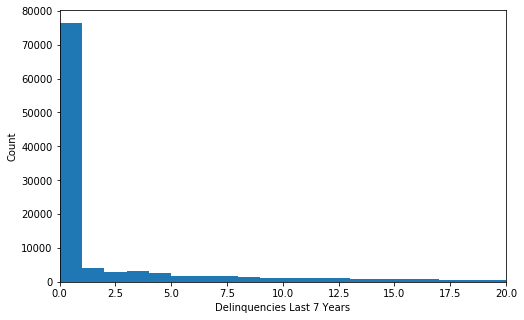

In [20]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, max(df['DelinquenciesLast7Years'])+1, 1)
plt.hist(data=df_sub,x='DelinquenciesLast7Years',bins=bins);
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');
plt.xlim(0,20);

After removing the outliers, the graph looks more informative. Most of the people have zero delinquency, some people have 2.5 to 5 delinquencies in the last 7 years.

In [21]:
# calcute averge Credit Score Range
df['average_CreditScore'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2

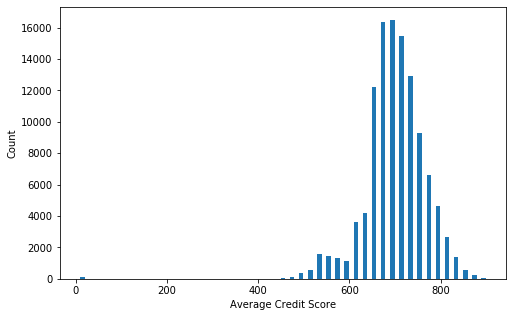

In [22]:
# plot the distribution of averge Credit Score
plt.figure(figsize=[8, 5])
bins = np.arange(9, max(df['average_CreditScore'])+10, 10)
plt.hist(data=df,x='average_CreditScore',bins=bins);
plt.xlabel('Average Credit Score')
plt.ylabel('Count');


In [23]:
# since credit score is an important factor that affect interest rate, I will remove all the nan and low outliers (ex: 9.5) to have better visibility
df = df[df['average_CreditScore'].notna()]
# select low outliers, using criteria eyeballed from the plots

low_outliers = (df['average_CreditScore'] < 400)
df = df.loc[-low_outliers,:]

## Distribution of Average Credit Score

The majority of borrowers have credit scores around 700. The minimum credit score is 420. Credit scores were not available for 569 borrowers, and 133 borrowers had credit scores in the 0 to 19 range. I removed these records from the dataset. I will take a closer look at credit scores later.

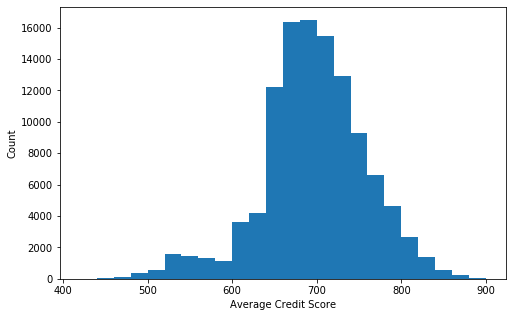

In [24]:
# re-plot the distribution of averge Credit Score
plt.figure(figsize=[8, 5])
bins = np.arange(420, max(df['average_CreditScore'])+20, 20)
plt.hist(data=df,x='average_CreditScore',bins=bins);
plt.xlabel('Average Credit Score')
plt.ylabel('Count');

## Distribution of Monthly Income

The maximum reported monthly income was over 1 million, and there were several other outliers, but the majority of the data was between 0 and 10000 so the graph is zoomed in on this part. The graph is skewed to the right as is expected of income distributions. There are small spikes at multiples of 10000, which are commonly reported incomes. Some borrowers are unemployed and reported monthly incomes of 0.

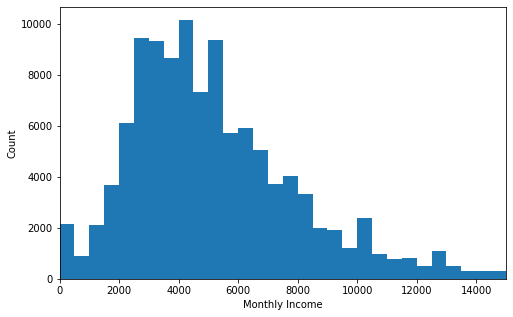

In [25]:
# plot Monthly Income
plt.figure(figsize=[8, 5])
bins = np.arange(min(df['StatedMonthlyIncome']), max(df['StatedMonthlyIncome'])+500, 500)
plt.hist(data=df,x='StatedMonthlyIncome',bins=bins);
plt.xlabel('Monthly Income')
plt.ylabel('Count');
plt.xlim(0,15000);

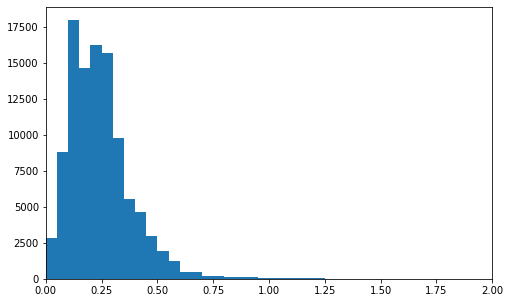

In [26]:
# plot for Debt to Income ratio (DTI) on a standard scale
bin_size=0.05
plt.figure(figsize=[8, 5])
bins = np.arange(df['DebtToIncomeRatio'].min(),df['DebtToIncomeRatio'].max()+bin_size,bin_size)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins);
df['DebtToIncomeRatio'].describe()
plt.xlim(0,2);

## Distribution of DebtTo Income Ratio

In the case of the DTI ratio, the small bin size proves very illuminating. There are very large spikes in frequency at 20%; there were several other outliers. In general, the majority of the DTI ratio is below 60%.


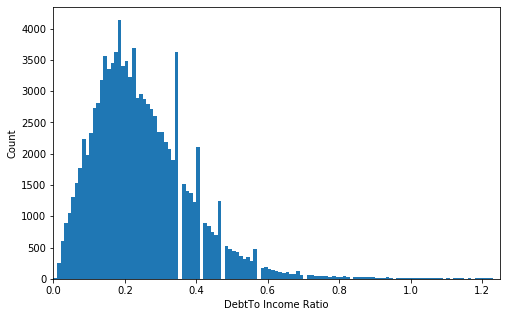

In [27]:
# investigating further on an even smaller bin size
bin_size=0.01
plt.figure(figsize=[8, 5])
bins = np.arange(df['DebtToIncomeRatio'].min(),df['DebtToIncomeRatio'].max()+bin_size,bin_size)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins);
plt.xlabel('DebtTo Income Ratio')
plt.ylabel('Count');
plt.xlim(0,1.25);

## Univariate Summary
During univariate analysis, the interest rate distribution looks roughly bimodal with one peak at 32%. The amount of loan in this dataset has mostly small loans. There are spikes at 4000, the minimum loan is set at $1000.

The majority of borrowers have credit scores around 700. The minimum credit score is 420. Credit scores were not available for 569 borrowers, and 133 borrowers had average credit scores at 9.5, therefore, I removed these records from the dataset. As for loan status, most of the borrower is in "current" and "completed" status (around 83%); there is 17% of the borrowers who didn't repay their loans on time.

# Bivariate Exploration

First, I created the correlation heatmap and scatterplot matrix to identify variables that would be interesting to investigate more closely.

In [28]:
numeric_vars = ['BorrowerRate', 'DebtToIncomeRatio', 'average_CreditScore', 'LoanOriginalAmount', 'Term', 'StatedMonthlyIncome', 'DelinquenciesLast7Years']
categoric_vars = ['LoanStatus', 'Occupation','EmploymentStatus','IsBorrowerHomeowner']

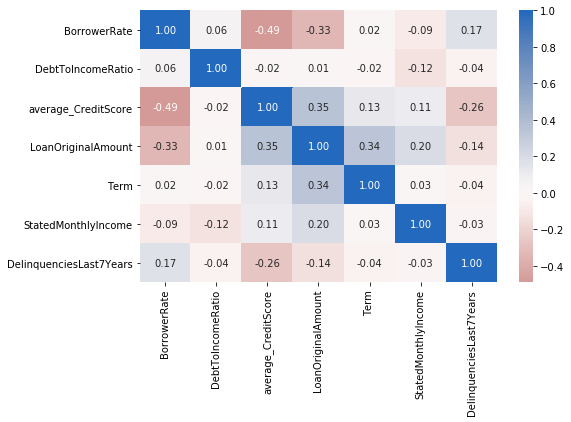

In [29]:
# plot correlation 
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_vars].corr(),annot=True, fmt='.2f',cmap='vlag_r',center=0);


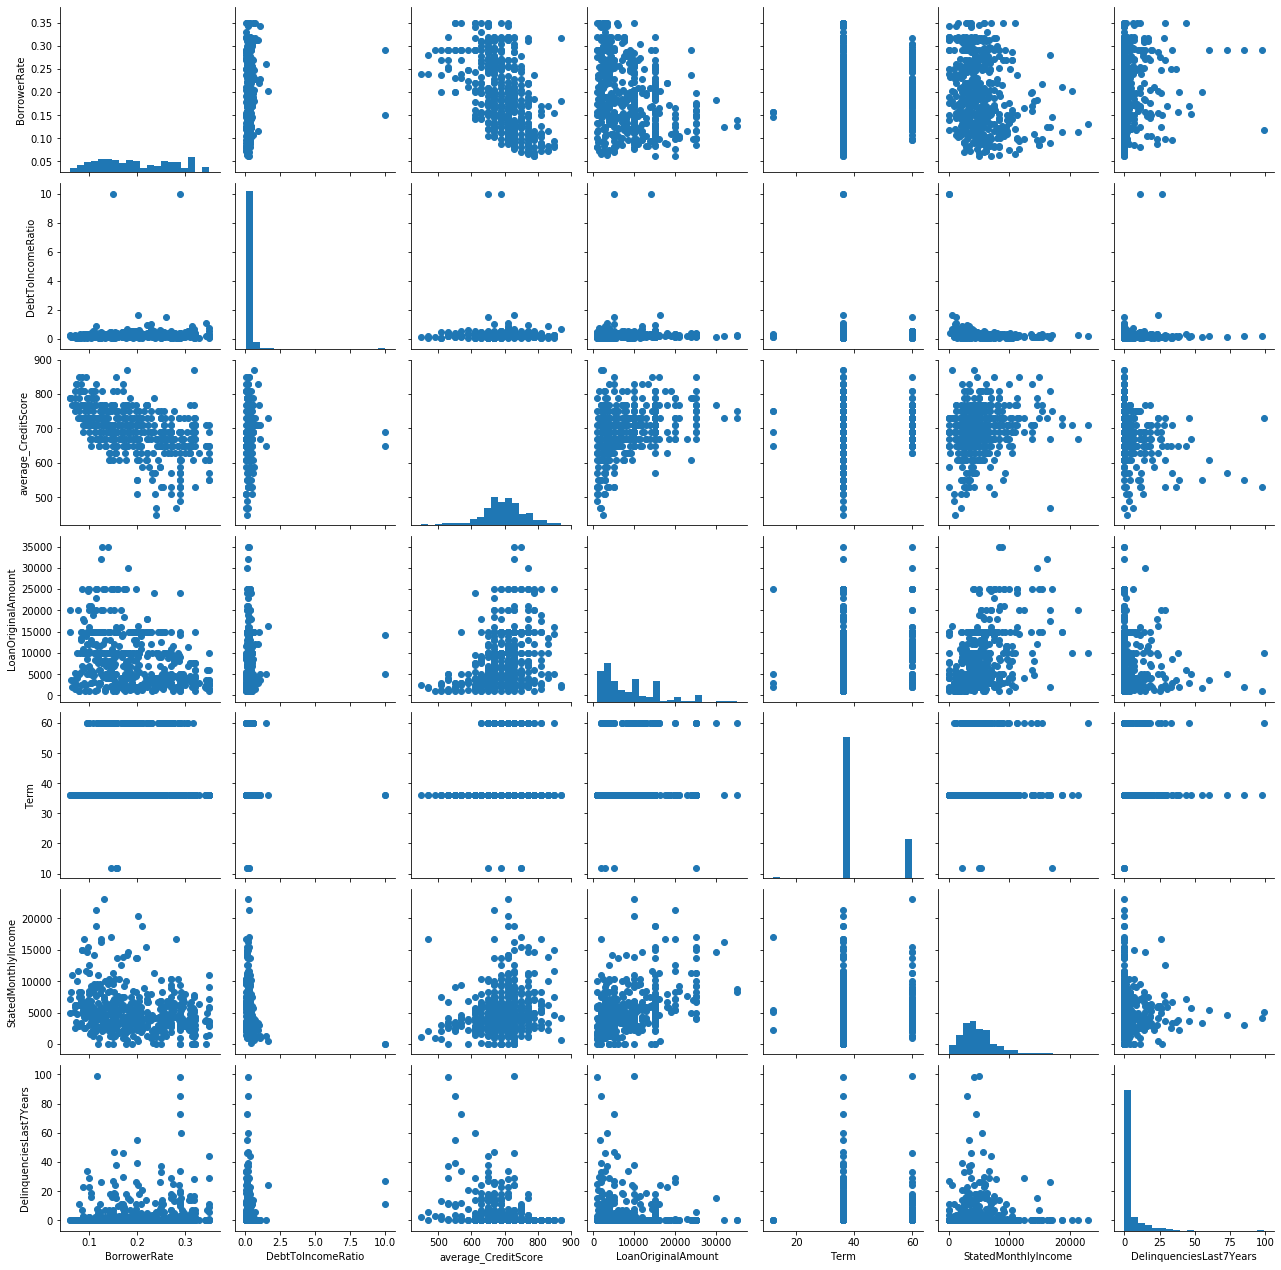

In [30]:
# plot matrix: sample 500 loans 
# samples = np.random.choice(df.shape[0], 500, replace = False)
# df_samp = df.loc[samples,:]
df_samp = df.sample(500, replace=False)

g = sns.PairGrid(data=df_samp,vars=numeric_vars);
g.map_diag(plt.hist,bins=20);
g.map_offdiag(plt.scatter);

Surprisingly, there is no strong correlation between variables. The BorrowRate and Credit Score has a moderate negative relationship. This will be worth extra exploration in this section. 

Let's move on to looking at how Interest Rate and Credit Score correlate with the categorical variables.

/Users/Chiu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 576x360 with 0 Axes>

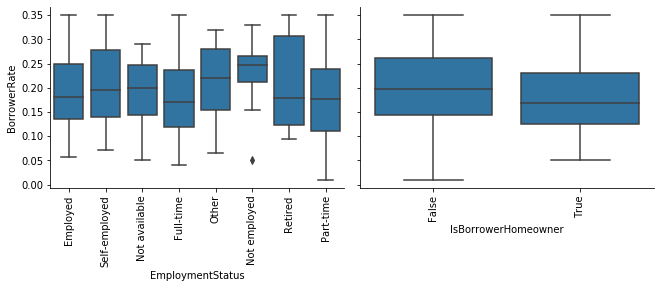

In [31]:
# plot matrix of numeric features against categorical features.
# use a 3000 sample since there are fewer plots and they're simpler in nature.
df_samp = df.sample(3000, replace=False)

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);

plt.figure(figsize = [8, 5]);
g = sns.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner'],
                size = 3, aspect = 1.5);
g.map(boxgrid);


The result is as expected, it appears that there are some negative relationships between the categorical variables and the interest rate. The borrowers with collateral(homeowner) have lower rates than those who do not own the house. The people who are not employed having a higher rate than the people who have jobs. Interestingly, the borrowers with a part-time job have the lowest interest rate among all the borrowers. This will be worth investigating more, later on, using the full data.

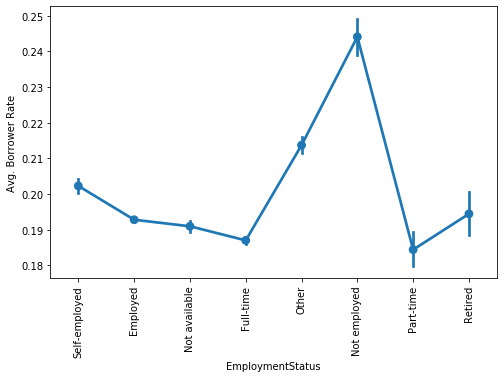

In [32]:
# point plot of interest rate vs. Employment Status
plt.figure(figsize=[8, 5])
sns.pointplot(data=df,x='EmploymentStatus',y='BorrowerRate')
plt.xticks(rotation=90)
plt.ylabel('Avg. Borrower Rate');

As I expected, borrowers are unemployed have the highest loan interest rate. borrowers are employed to have a lower interest rate.
People who have a part-time job has the lowest interest rate, maybe they are student, therefore, their interest rate is lower than others.

## Interest Rate vs. Average Credit Score

There is a moderate negative correlation here, people with higher credit scores have a lower loan interest rate, or people who want to borrow at a lower interest rate must have a higher credit score.

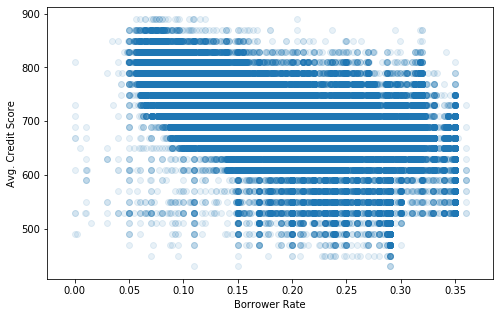

In [33]:
# scatter plot of interest rate vs. average credit score
plt.figure(figsize = [8, 5])
plt.scatter(data = df, y = 'average_CreditScore', x = 'BorrowerRate', alpha = 1/10)
plt.ylabel('Avg. Credit Score')
plt.xlabel('Borrower Rate');

## Interest Rate and Delinquencies Last 7 Years

The number of delinquencies does not have a strong correlation with the interest rate as I thought. It seems that there is still a positive relationship between them. Let's see the relationship between Credit Score and delinquencies later. Maybe the relationship will be clearer with a scatterplot of delinquencies and credit score.

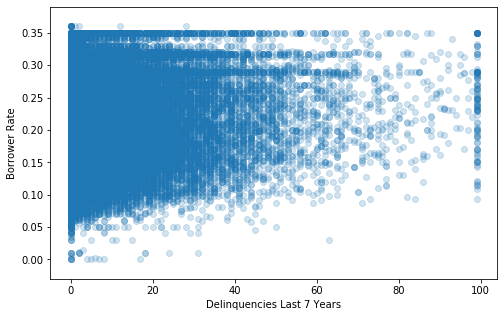

In [34]:
# scatter plot of interest rate vs. Number of Delinquencies in last 7 years
plt.figure(figsize = [8, 5])
plt.scatter(data = df, y = 'BorrowerRate', x = 'DelinquenciesLast7Years', alpha = 1/5)
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Borrower Rate');

## Credit Score and Delinquencies Last 7 Years

It seems that there’s a negative correlation which is still not as strong as I would expect it to be. I find it abnormal that the people can get a credit score of more than 500  with more than 80 delinquencies in the past 7 years.

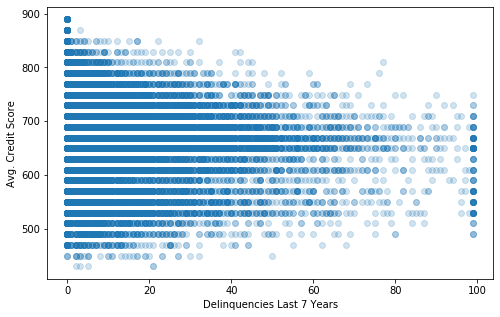

In [35]:
# scatter plot of interest rate vs. Number of Delinquencies in last 7 years
plt.figure(figsize = [8, 5])
plt.scatter(data = df, y = 'average_CreditScore', x = 'DelinquenciesLast7Years', alpha = 1/5)
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Avg. Credit Score');

## Credit Score and Loan Original Amount
It’s clear that there’s a positive correlation which is not as strong as I would expect it to be.
People with higher credit scores tend to borrow more, or people who want to borrow more must have a higher credit score.

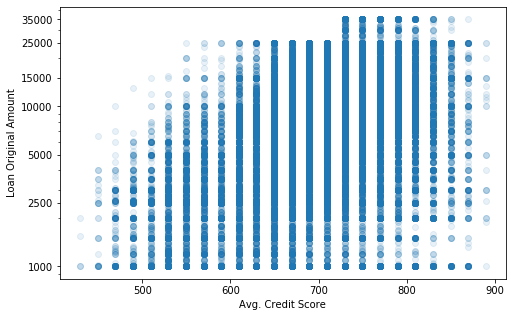

In [36]:
# scatter plot of interest rate vs. average credit score

plt.figure(figsize = [8, 5])
plt.scatter(data = df, y = 'LoanOriginalAmount', x = 'average_CreditScore', alpha = 1/10)
plt.yscale('log')
ticks=[1000,2500, 5000, 10000, 15000,25000, 35000]
labels=['{}'.format(v) for v in ticks]

plt.yticks(ticks,labels)
plt.ylabel('Loan Original Amount')
plt.xlabel('Avg. Credit Score');


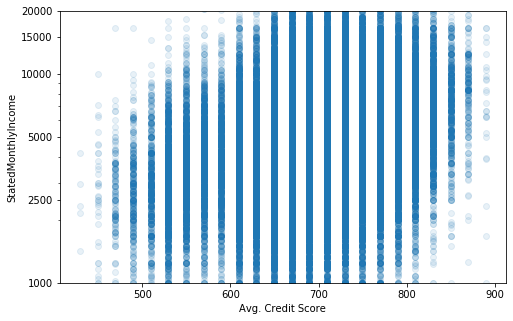

In [37]:
# scatter plot of interest rate vs. Monthly Income
plt.figure(figsize = [8, 5])
plt.scatter(data = df, y = 'StatedMonthlyIncome', x = 'average_CreditScore', alpha = 1/10)
plt.yscale('log')
ticks=[1000,2500, 5000, 10000, 15000,20000]
labels=['{}'.format(v) for v in ticks]
plt.ylim(1000,20000)
plt.yticks(ticks,labels)
plt.ylabel('StatedMonthlyIncome')
plt.xlabel('Avg. Credit Score');

Monthly Income has positively correlated with credit score but it is not as strong as I thought. People with higher incomes have a higher credit score.

## Interest rate and Monthly Income

In general, borrowers with higher salaries tend to get a lower loan interest rate. It seems there are some low outliers below 0.05 interest rates. 

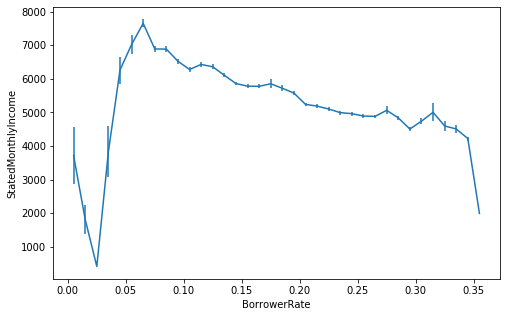

In [38]:
# plot line chart between average monthly income and interest rate
# set bin edges, compute centers
bin_size = 0.01
plt.figure(figsize=[8, 5])
xbin_edges = np.arange(0, df['BorrowerRate'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['BorrowerRate'], xbin_edges, right = False, include_lowest = True)
y_means = df['StatedMonthlyIncome'].groupby(data_xbins).mean()
y_sems = df['StatedMonthlyIncome'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('BorrowerRate')
plt.ylabel('StatedMonthlyIncome');

## Bivariate Summary
There is no strong relationship between variables in this dataset. Borrowers are unemployed have higher loan interest rate than borrowers with jobs. There is a moderate negative correlation between credit score and interest rate, people with higher credit scores have a lower loan interest rate. Moreover, the number of delinquencies in the last 7 year, income have a positive relationship with interest rate but it is not as strong as I expected. Borrowers with a higher salary and good repay history tend to get a lower loan interest rate.

There is a negative relationship between delinquencies in the past 7 years and average credit score; However, loan original amount and income have a positive relationship with the average credit score. I find it is abnormal that the people who have more than 80 delinquencies in the past 7 years get more than 500 credit score. 


# Multivariate Exploration

In this part, I created a new column called cat_loanstatus, which is true if there was an issue with the repayment of the loan. "Delinquent" should be true for loans that are defaulted, charged off, or past due; "Good" for the rest of the loan status.

In [39]:
# reference: https://stackoverflow.com/questions/54150377/categorize-a-string-column-based-on-the-text-word-present-in-it-using-pre-defi        
status=['Current','Completed','FinalPaymentInProgress','Cancelled']
def cat_Lstatus(row):
    for i in status:
        if i in row:
            return 0
    return 1
df["cat_loanstatus"] = df.LoanStatus.apply(lambda x: cat_Lstatus(x))

In [40]:
pivot_employstatus = df.groupby('cat_loanstatus').agg({'average_CreditScore':'mean','BorrowerRate':'mean'})
pivot_employstatus = pivot_employstatus.reset_index()
pivot_employstatus["cat_loanstatus"].replace({1: "Delinquent", 0: "Good"}, inplace=True)
pivot_employstatus = pivot_employstatus.sort_values(['average_CreditScore'],ascending=True).head(10)

pivot_employstatus

,cat_loanstatus,average_CreditScore,BorrowerRate
1,Delinquent,658.707784,0.232035
0,Good,703.280984,0.185053


## Interest Rate and Credit Score by delinquency Status

As we know, delinquency is correlated with credit scores and interest rates. We have a more clear result, people who are delinquent tend to get higher interest rates than people with good records and have lower credit scores than people with good records.

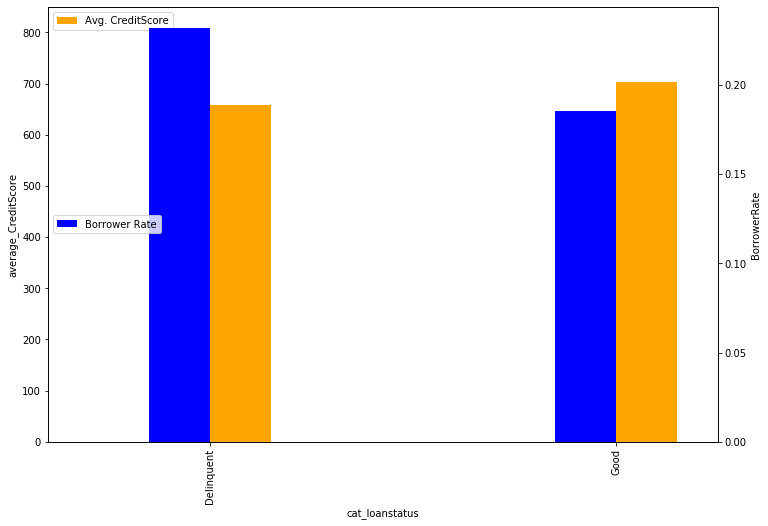

In [43]:
# reference: https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
# Create matplotlib figure
fig = plt.figure(figsize=(8,5))
# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

width = 0.15

average_CreditScore = pivot_employstatus.plot(x='cat_loanstatus', y='average_CreditScore', kind='bar', color = 'orange',
                  width=width, ax=ax, position = 0, figsize=(12,8), label = 'Avg. CreditScore')
BorrowerRate = pivot_employstatus.plot(x='cat_loanstatus', y='BorrowerRate', kind='bar', color = 'blue',
                  width=width, ax=ax2, position = 1, figsize=(12,8), label = 'Borrower Rate')


ax.set_ylabel('average_CreditScore')
average_CreditScore.legend(loc='upper left')
ax.set(adjustable='box', ylim=(0,850))
ax2.set_ylabel('BorrowerRate')
ax2.legend(loc='center left')
ax.set_xlabel('cat_loanstatus');
# plt.title('Interest Rate and Credit Score by delinquency Status');

In [44]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(420, 850+20,20)
    bins_y = np.arange(0, 0.2+0.01, 0.01)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

/Users/Chiu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

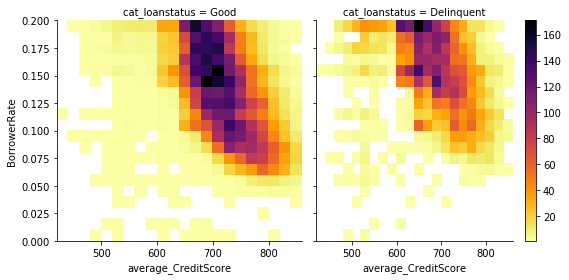

In [45]:
# analysis is how the two categorical measures of loan status play into the relationship between interest rate and credit score.
# create faceted heat maps on cat_loanstatus variable
df["cat_loanstatus"].replace({1: "Delinquent", 0: "Good"}, inplace=True)
plt.figure(figsize=[8, 5])
g = sns.FacetGrid(data = df, col = 'cat_loanstatus', col_wrap = 2, size = 4,ylim = [0, 0.2])
g.map(hist2dgrid, 'average_CreditScore','BorrowerRate', color = 'inferno_r',cmin=0.5)
g.set_xlabels('average_CreditScore')
g.set_ylabels('BorrowerRate')
plt.colorbar();

In the faceted heat maps, you can see the relationship of loan status against interest rate and credit score. 
For delinquent, the credit score is between 600 to 650 and interest is higher than the people with good records.

I tried looking at point plot across two categories of loan status against Employment Status, Debit to income ratio, Interest rate, and credit score

In [46]:
# compute the logarithm of variables to make multivariate plotting easier
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_StatedMonthlyIncome'] = df['StatedMonthlyIncome'].apply(log_trans)
df['log_DTI'] = df['DebtToIncomeRatio'].apply(log_trans)

In [47]:
df["cat_loanstatus"].value_counts()

Good          94404
Delinquent    18808
Name: cat_loanstatus, dtype: int64

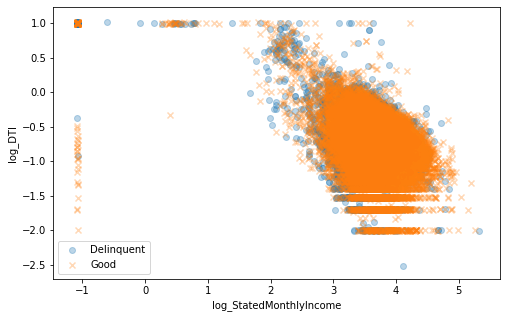

In [48]:
# log monthly income and log debt to income ration by cat_loanstatus
plt.figure(figsize=[8, 5])
cat_marker=[['Delinquent','o'],['Good','x']]
for cat , marker in cat_marker:
    df_cat=df[df['cat_loanstatus']==cat]
    sns.regplot(data=df_cat,x='log_StatedMonthlyIncome',y='log_DTI',x_jitter=0.01,y_jitter=0.01,scatter_kws={'alpha':0.3},fit_reg=False,marker=marker);
plt.legend(['Delinquent','Good']);

Monthly income and debt to income ratio explain some of the variations in loan delinquency status.

## Debt To Income Ratio and Credit Score for Interest Rate

Debt to income ratio and Average credit score explains the variation in interest rate.

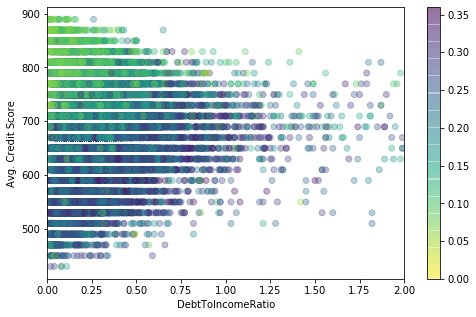

In [49]:
# debt to income ratio and credit score by interest rate
plt.figure(figsize=[8, 5])
plt.scatter(data = df, x = 'DebtToIncomeRatio', y = 'average_CreditScore', c = 'BorrowerRate',cmap='viridis_r',alpha=1/3);
plt.xlabel('DebtToIncomeRatio')
plt.xlim(0,2);
plt.ylabel('Avg. Credit Score');
plt.colorbar();

## Interest Rate and Employment Status by delinquency Status
Employment status and cat loan status explain the variation in interest rate.

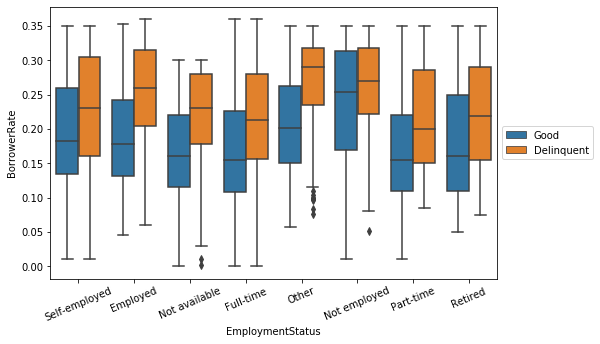

In [50]:
plt.figure(figsize=[8, 5])
sns.boxplot(data=df,x='EmploymentStatus',y='BorrowerRate',hue='cat_loanstatus',dodge=0.3);
plt.xticks(rotation=23);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

## Debt To Income Ratio and Employment Status by delinquency Status

A dodged point plot for loans shows the clear influence of employment status and loan status on the DTI ratio. Delinquents have a higher DTI ratio than good borrowers, except borrowers with part-time jobs.

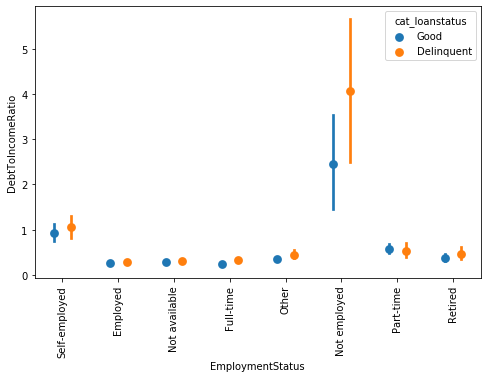

In [51]:
plt.figure(figsize=[8, 5])
ax = sns.pointplot(data=df,x='EmploymentStatus',y='DebtToIncomeRatio',hue='cat_loanstatus',dodge=0.3,linestyles='');
plt.xticks(rotation=90);

# Conclusion

I extended my investigation of interest rate against credit score in this section by looking at the impact of the loan status, employment status, and DTI ratio. The multivariate exploration here showed that there indeed is a negative effect of increased credit score, level of employment, DTI ratio, and repayment history on the loan interest rate. The people who are not employed having a higher interest rate and DTI ratio than the people who have jobs. Furthermore, monthly income and debt to income ratio explain some of the variations in loan delinquency status. 


Looking back on the point plots, the borrowers who have a part-time job have the lowest loan interest rate which is a little bit absurd. In the future, I will use more variables in this dataset to dig into the reason.